                 *** Data Analysis of Heart Disease Dataset ***
The Heart Disease dataset from the UCI Machine Learning Repository is a widely-used 
dataset in medical data analysis. It contains information about various health-related 
attributes of patients and whether they have heart disease or not. 

### Task 1: Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df  = pd.read_csv(r'heart.csv')
df.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [3]:
df.describe()

Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
df['Target'] = df['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Target'].value_counts()

Target
0    164
1    139
Name: count, dtype: int64

### Task 2: Data Cleaning and Preprocessing

In [7]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
Target        0
dtype: int64

In [14]:
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)
df['Ca'].fillna(df['Ca'].mean(), inplace=True)
df.isnull().sum()

C:\Users\210838\AppData\Local\Temp\ipykernel_19328\3646147856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(df['Ca'].mean(), inplace=True)


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
Target        0
dtype: int64

In [16]:
#Feature Engineering: 
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPain', 'RestECG', 'ExAng', 'Thal'], drop_first=True)
df_encoded.head()

Unnamed: 0  Age  RestBP  Chol  Fbs  MaxHR  Oldpeak  Slope   Ca  AHD  \
0           1   63     145   233    1    150      2.3      3  0.0   No   
1           2   67     160   286    0    108      1.5      2  3.0  Yes   
2           3   67     120   229    0    129      2.6      2  2.0  Yes   
3           4   37     130   250    0    187      3.5      3  0.0   No   
4           5   41     130   204    0    172      1.4      1  0.0   No   

   Target  Sex_1  ChestPain_nonanginal  ChestPain_nontypical  \
0       0   True                 False                 False   
1       1   True                 False                 False   
2       1   True                 False                 False   
3       0   True                  True                 False   
4       0  False                 False                  True   

   ChestPain_typical  RestECG_1  RestECG_2  ExAng_1  Thal_normal  \
0               True      False       True    False        False   
1              False      False       True     True         True   
2              False      False       True     True        False   
3              False      False      False    False         True   
4              False      False       True    False         True   

   Thal_reversable  
0            False  
1            False  
2             True  
3            False  
4            False

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Target'] = label_encoder.fit_transform(df_encoded['Target'])
df_encoded.head()

Unnamed: 0  Age  RestBP  Chol  Fbs  MaxHR  Oldpeak  Slope   Ca  AHD  \
0           1   63     145   233    1    150      2.3      3  0.0   No   
1           2   67     160   286    0    108      1.5      2  3.0  Yes   
2           3   67     120   229    0    129      2.6      2  2.0  Yes   
3           4   37     130   250    0    187      3.5      3  0.0   No   
4           5   41     130   204    0    172      1.4      1  0.0   No   

   Target  Sex_1  ChestPain_nonanginal  ChestPain_nontypical  \
0       0   True                 False                 False   
1       1   True                 False                 False   
2       1   True                 False                 False   
3       0   True                  True                 False   
4       0  False                 False                  True   

   ChestPain_typical  RestECG_1  RestECG_2  ExAng_1  Thal_normal  \
0               True      False       True    False        False   
1              False      False       True     True         True   
2              False      False       True     True        False   
3              False      False      False    False         True   
4              False      False       True    False         True   

   Thal_reversable  
0            False  
1            False  
2             True  
3            False  
4            False

In [ ]:
 #Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df_encoded[['RestBP', 'Chol', 'MaxHR']])
df_encoded.head()

Unnamed: 0  Age    RestBP      Chol  Fbs     MaxHR  Oldpeak  Slope   Ca  \
0           1   63  0.757525 -0.264900    1  0.017197      2.3      3  0.0   
1           2   67  1.611220  0.760415    0 -1.821905      1.5      2  3.0   
2           3   67 -0.665300 -0.342283    0 -0.902354      2.6      2  2.0   
3           4   37 -0.096170  0.063974    0  1.637359      3.5      3  0.0   
4           5   41 -0.096170 -0.825922    0  0.980537      1.4      1  0.0   

   AHD  ...  Sex_1  ChestPain_nonanginal  ChestPain_nontypical  \
0   No  ...   True                 False                 False   
1  Yes  ...   True                 False                 False   
2  Yes  ...   True                 False                 False   
3   No  ...   True                  True                 False   
4   No  ...  False                 False                  True   

   ChestPain_typical  RestECG_1  RestECG_2  ExAng_1  Thal_normal  \
0               True      False       True    False        False   
1              False      False       True     True         True   
2              False      False       True     True        False   
3              False      False      False    False         True   
4              False      False       True    False         True   

   Thal_reversable  Exercise_Induced_Heart_Stress  
0            False                            6.9  
1            False                            3.0  
2             True                            5.2  
3            False                           10.5  
4            False                            1.4  

[5 rows x 21 columns]

In [26]:
df_encoded['Exercise_Induced_Heart_Stress'] = df_encoded['Oldpeak'] * df_encoded['Slope']
df_encoded.head()

Unnamed: 0  Age    RestBP      Chol  Fbs     MaxHR  Oldpeak  Slope   Ca  \
0           1   63  0.757525 -0.264900    1  0.017197      2.3      3  0.0   
1           2   67  1.611220  0.760415    0 -1.821905      1.5      2  3.0   
2           3   67 -0.665300 -0.342283    0 -0.902354      2.6      2  2.0   
3           4   37 -0.096170  0.063974    0  1.637359      3.5      3  0.0   
4           5   41 -0.096170 -0.825922    0  0.980537      1.4      1  0.0   

   AHD  ...  Sex_1  ChestPain_nonanginal  ChestPain_nontypical  \
0   No  ...   True                 False                 False   
1  Yes  ...   True                 False                 False   
2  Yes  ...   True                 False                 False   
3   No  ...   True                  True                 False   
4   No  ...  False                 False                  True   

   ChestPain_typical  RestECG_1  RestECG_2  ExAng_1  Thal_normal  \
0               True      False       True    False        False   
1              False      False       True     True         True   
2              False      False       True     True        False   
3              False      False      False    False         True   
4              False      False       True    False         True   

   Thal_reversable  Exercise_Induced_Heart_Stress  
0            False                            6.9  
1            False                            3.0  
2             True                            5.2  
3            False                           10.5  
4            False                            1.4  

[5 rows x 21 columns]

### Task 3: Exploratory Data Analysis 

In [49]:
plt.figure(figsize=(20, 5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

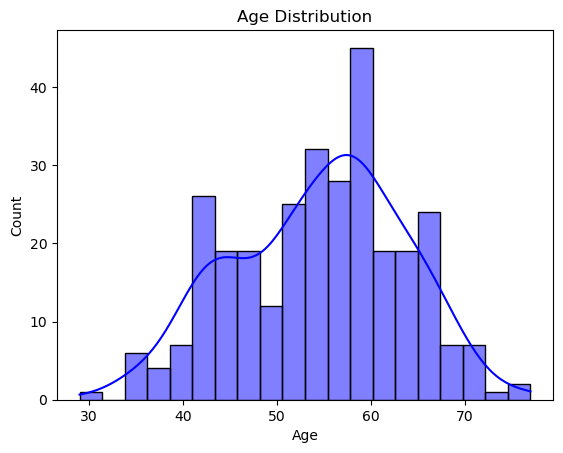

In [51]:
plt.subplot(1, 1, 1)
sns.histplot(df_encoded['Age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution')


Text(0.5, 1.0, 'Cholesterol Distribution')

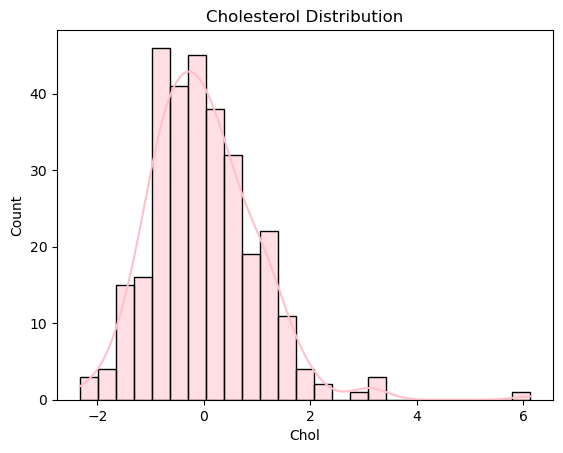

In [48]:
plt.subplot(1, 1, 1)
sns.histplot(df_encoded['Chol'], kde=True, color='pink', bins=25)
plt.title('Cholesterol Distribution')

Text(0.5, 1.0, 'Distribution of MaxHR')

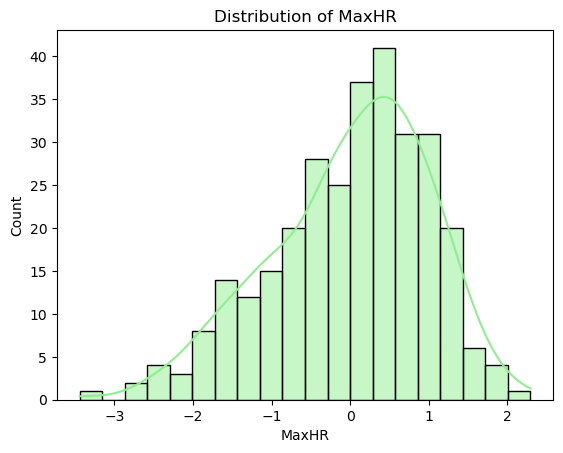

In [53]:
plt.subplot(1, 1, 1)
sns.histplot(df_encoded['MaxHR'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of MaxHR')

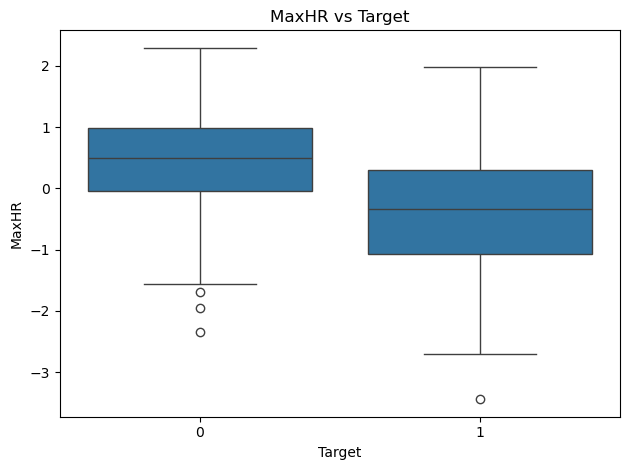

In [47]:
plt.subplot(1, 1, 1)
sns.boxplot(x='Target', y='MaxHR', data=df_encoded)
plt.title('MaxHR vs Target')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Target Distribution'),
 Text(0.5, 0, 'Target (0 = No Disease, 1 = Disease)'),
 Text(0, 0.5, 'Count')]

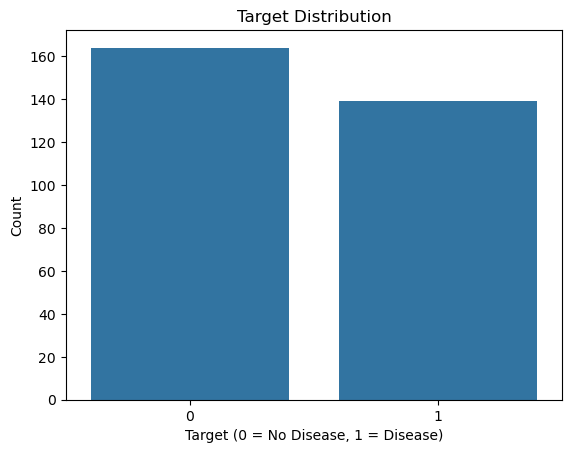

In [54]:
sns.countplot(x='Target', data=df_encoded).set(title='Target Distribution', xlabel='Target (0 = No Disease, 1 = Disease)', ylabel='Count')

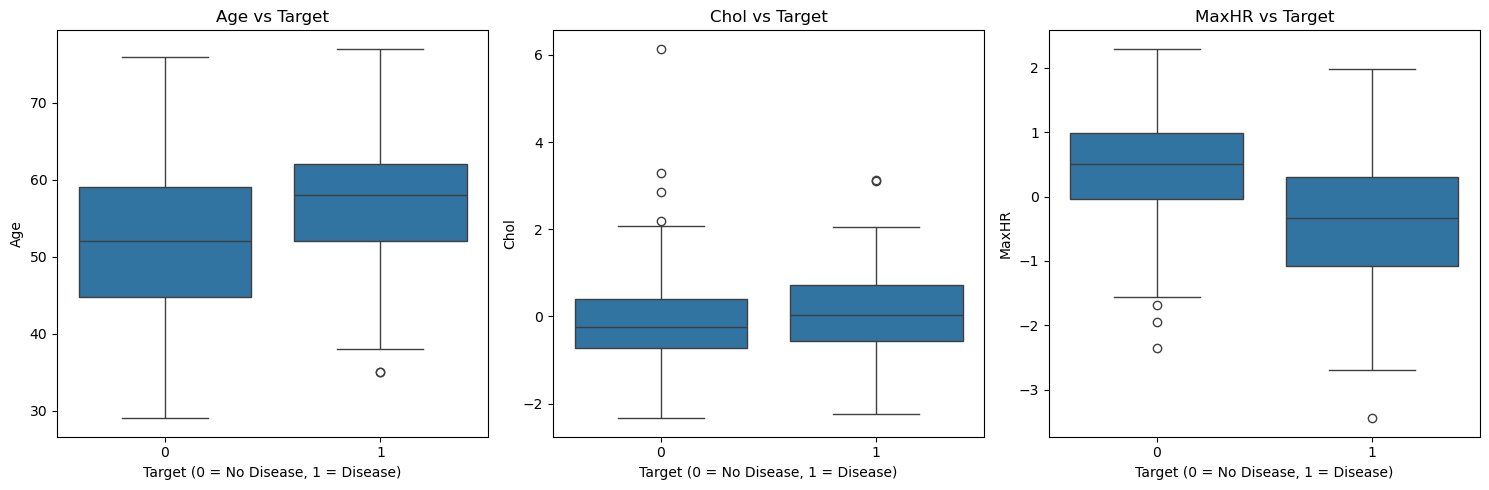

In [85]:
#Bivariate Analysis: 

numerical_features = ['Age', 'Chol', 'MaxHR']

# Create a figure with 3 subplots
plt.figure(figsize=(15, 5))

# Loop through each feature and plot the boxplot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)  # Create a subplot in a 1x3 grid
    sns.boxplot(x='Target', y=feature, data=df_encoded)  # Plot boxplot
    plt.title(f'{feature} vs Target')  # Set the title of the plot
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')  # Set the x-axis label
    plt.ylabel(feature)  # Set the y-axis label

# Adjust the layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [65]:
df_encoded.columns

Index(['Unnamed: 0', 'Age', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'Oldpeak',
       'Slope', 'Ca', 'AHD', 'Target', 'Sex_1', 'ChestPain_nonanginal',
       'ChestPain_nontypical', 'ChestPain_typical', 'RestECG_1', 'RestECG_2',
       'ExAng_1', 'Thal_normal', 'Thal_reversable',
       'Exercise_Induced_Heart_Stress'],
      dtype='object')

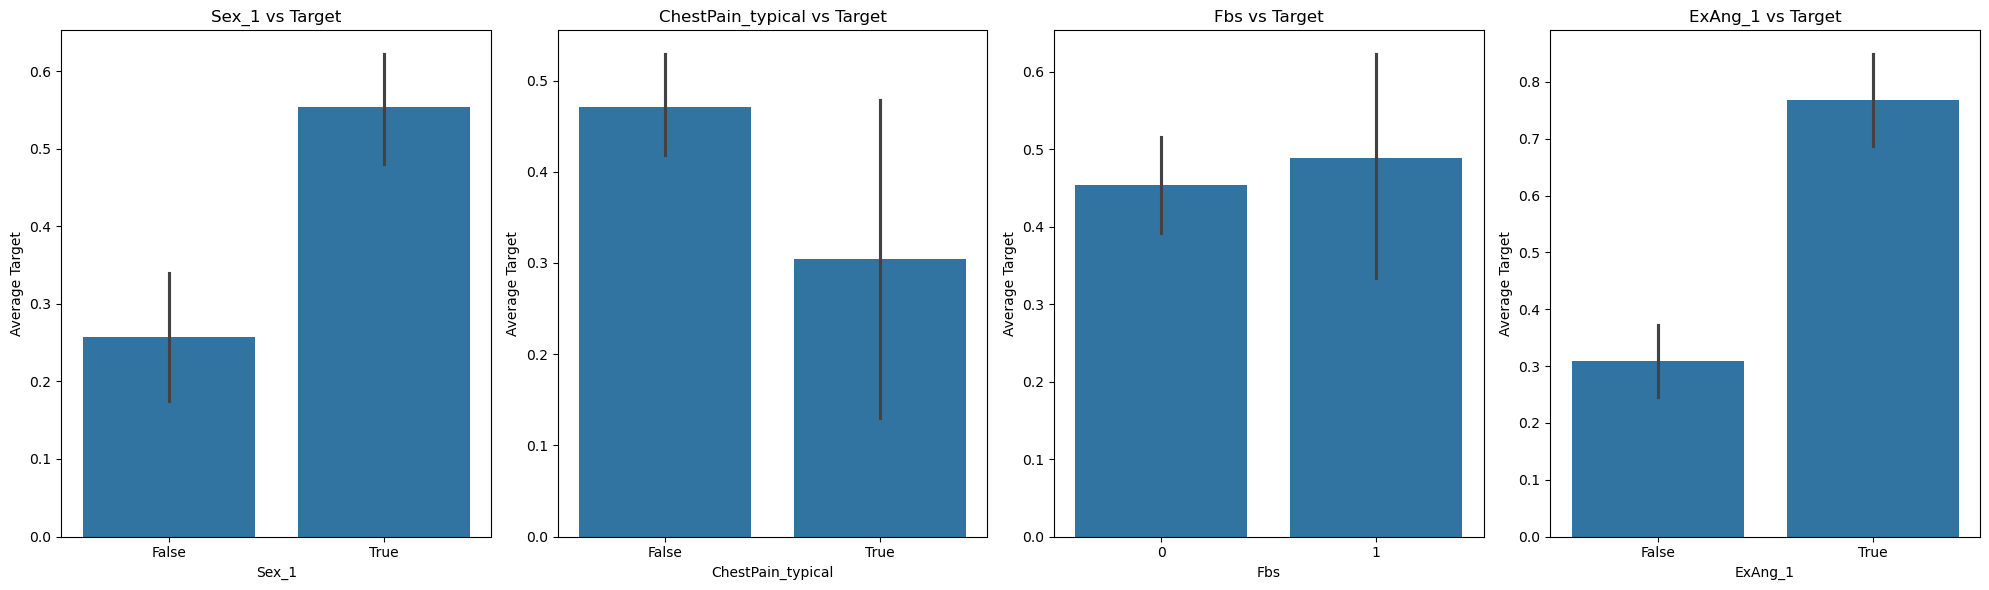

In [87]:

# Bar plot 
categorical_features = ['Sex_1', 'ChestPain_typical', 'Fbs', 'ExAng_1']
plt.figure(figsize=(20, 6))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 4, i)  
    sns.barplot(x=feature, y='Target', data=df_encoded, estimator=lambda x: sum(x)/len(x)) 
    plt.title(f'{feature} vs Target')  
    plt.xlabel(feature)  
    plt.ylabel('Average Target')  
plt.tight_layout()

plt.show()

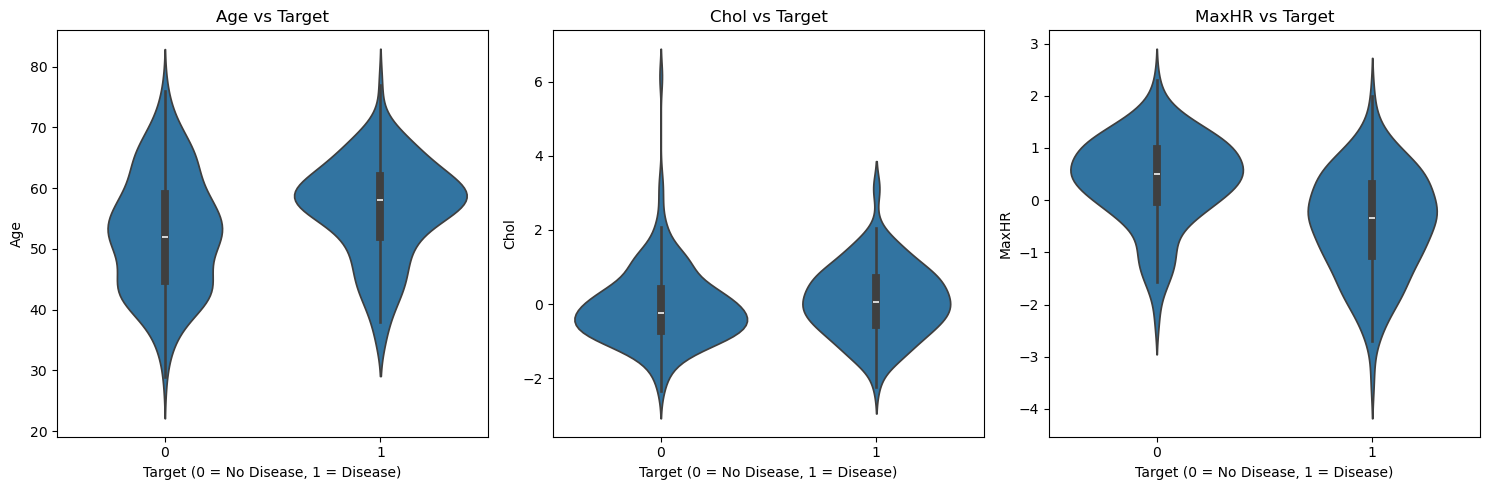

In [ ]:
#Viloin 
numerical_features = ['Age', 'Chol', 'MaxHR']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)  
    sns.violinplot(x='Target', y=feature, data=df_encoded)  
    plt.title(f'{feature} vs Target')  
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')  
    plt.ylabel(feature)  

plt.tight_layout()


plt.show()

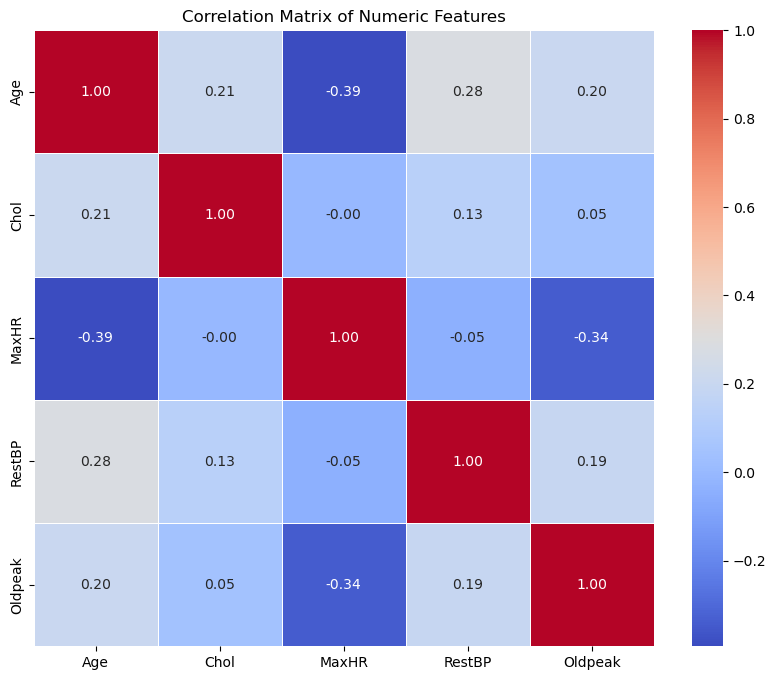

In [95]:
numeric_features = ['Age', 'Chol', 'MaxHR', 'RestBP', 'Oldpeak']
corr_matrix = df_encoded[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')

plt.show()

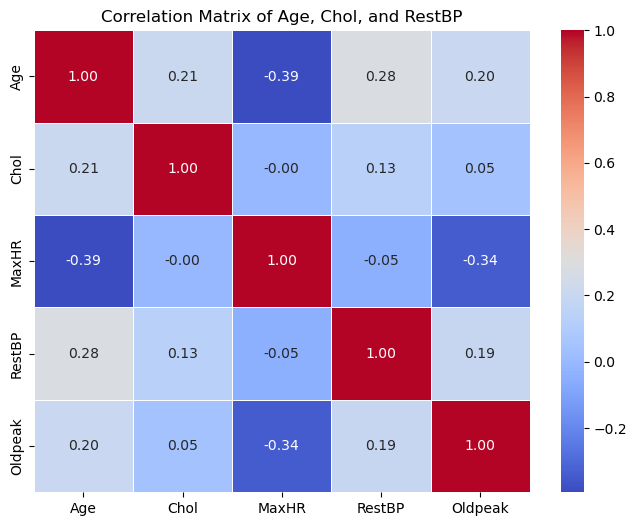

In [93]:
correlation_features = ['Age', 'Chol', 'RestBP']
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Age, Chol, and RestBP')
plt.show()

### Task 4: Aggregation and Insights

In [100]:
gender = df.groupby('Sex')['Target'].mean()
gender.value_counts

<bound method IndexOpsMixin.value_counts of Sex
0    0.257732
1    0.553398
Name: Target, dtype: float64>

In [101]:
survival_by_chestpain = df.groupby('ChestPain')['Target'].mean()
survival_by_chestpain.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: Target, dtype: float64>

In [102]:
survival_by_max_heartrate = df.groupby('ChestPain')['Target'].max()
survival_by_max_heartrate.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    1
nonanginal      1
nontypical      1
typical         1
Name: Target, dtype: int64>

In [109]:
avg_chol_by_target = df.groupby('Target')['Chol'].mean()
avg_chol_by_chestpain = df.groupby(['Target', 'ChestPain'])['Chol'].mean()
avg_chol_by_target
avg_chol_by_chestpain

Target  ChestPain   
0       asymptomatic    245.333333
        nonanginal      245.279412
        nontypical      240.682927
        typical         229.875000
1       asymptomatic    252.438095
        nonanginal      239.000000
        nontypical      263.444444
        typical         253.714286
Name: Chol, dtype: float64

### Task 5: Derive Medical Insights

In [110]:
#5 different insights
df.groupby('Sex')['Target'].mean()

Sex
0    0.257732
1    0.553398
Name: Target, dtype: float64

In [111]:
chestpain_heart_disease = df.groupby('ChestPain')['Target'].mean()
chestpain_heart_disease

ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: Target, dtype: float64

In [112]:
avg_chol_by_target = df.groupby('Target')['Chol'].mean()
avg_chol_by_target

Target
0    242.640244
1    251.474820
Name: Chol, dtype: float64

In [113]:
avg_maxhr_by_target = df.groupby('Target')['MaxHR'].mean()
avg_maxhr_by_target

Target
0    158.378049
1    139.258993
Name: MaxHR, dtype: float64

In [114]:
exercise_angina_heart_disease = df.groupby('ExAng')['Target'].mean()
exercise_angina_heart_disease

ExAng
0    0.308824
1    0.767677
Name: Target, dtype: float64